In [45]:
#One row corresponds to 10x10ms of data
import pandas as pd
list_sensors=['Sensor1_x','Sensor1_y','Sensor1_z','Sensor2_x','Sensor2_y','Sensor2_z', 'Sensor3_x','Sensor3_y','Sensor3_z']
def tabulate_data(file):
    f = open(filename,'rt')
    file_as_list= [[token.split(',') for token in line.split(';')] for line in f.readlines()]
    data=pd.DataFrame(file_as_list).T
    data=data[0].apply(pd.Series)
    headers=['Trackers']
    headers.extend(list_sensors*10)
    data.columns=headers
    return data
filename='./recordings+7.14+Luc/hooks_waterbag_hard_40-T7L-1531552258694.txt'
try_waterbag_hard=tabulate_data(filename)
try_waterbag_hard.head()

,Trackers,Sensor1_x,Sensor1_y,Sensor1_z,Sensor2_x,Sensor2_y,Sensor2_z,Sensor3_x,Sensor3_y,Sensor3_z,...,Sensor3_z,Sensor1_x,Sensor1_y,Sensor1_z,Sensor2_x,Sensor2_y,Sensor2_z,Sensor3_x,Sensor3_y,Sensor3_z
0,T7L,-62,-283,47,-1852,-336,820,-585,367,482,...,460,118,270,140,-1838,-326,678,-583,368,467
1,T7L,140,215,130,-1870,-355,715,-587,365,471,...,478,53,-534,77,-1703,-647,787,-570,336,478
2,T7L,50,-550,90,-1754,-588,804,-575,342,480,...,488,188,-280,50,-1890,-393,870,-589,361,487
3,T7L,230,-340,60,-1890,-350,830,-589,365,483,...,531,-44,-1332,58,-1400,-120,1402,-540,388,540
4,T7L,-38,-1034,97,-1370,32,1354,-537,403,535,...,504,104,-98,46,-1658,-452,1044,-565,355,504


In [35]:
#Assuming that data for sensor abc direction xyz is repeated every 9th column:
import pandas as pd
list_sensors=['Sensor1_a','Sensor1_b','Sensor1_c','Sensor2_a','Sensor2_b','Sensor2_c', 'Sensor3_a','Sensor3_b','Sensor3_c']
def tabulate_data1(file):
    f = open(filename,'rt')
    remove_trackerName= [line.replace('T7L,', "") for line in f.readlines()]
    file_as_list= [[token.split(',') for token in line.split(';')] for line in remove_trackerName][0]
    file_as_list=sum([l for l in file_as_list], []) #flattens the nested list comprehension into one list
    chunks= [file_as_list[i:i+9] for i in range(0,len(file_as_list),9)]
    data=pd.DataFrame(chunks).apply(pd.to_numeric, errors='coerce')
    data.columns=list_sensors
    return data

filename='./recordings+7.14+Luc/hooks_waterbag_hard_40-T7L-1531552258694.txt'
waterbag_hard_T7L=tabulate_data1(filename)
waterbag_hard_T7L.head()

,Sensor1_a,Sensor1_b,Sensor1_c,Sensor2_a,Sensor2_b,Sensor2_c,Sensor3_a,Sensor3_b,Sensor3_c
0,-62.0,-283.0,47.0,-1852.0,-336.0,820.0,-585.0,367.0,482.0
1,-73.0,-293.0,40.0,-1811.0,-356.0,808.0,-581.0,365.0,480.0
2,-83.0,-300.0,40.0,-1793.0,-367.0,762.0,-579.0,364.0,476.0
3,-87.0,-303.0,40.0,-1758.0,-399.0,708.0,-575.0,361.0,470.0
4,-59.0,-274.0,40.0,-1702.0,-427.0,641.0,-570.0,358.0,464.0


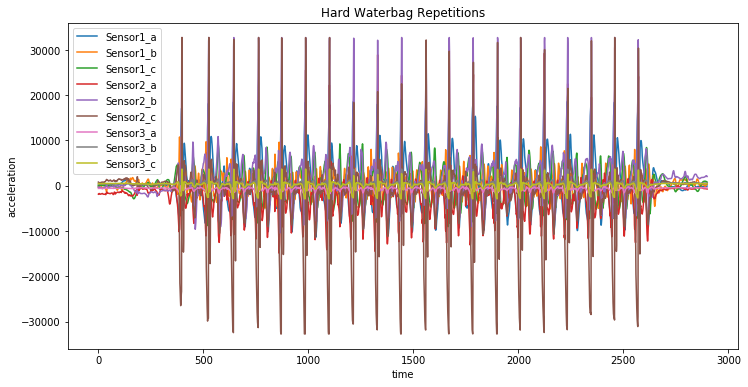

In [54]:
#Basic visualization
import matplotlib.pyplot as plt
%matplotlib inline
waterbag_hard_T7L.plot(figsize=(12, 6))
plt.xlabel('time'), plt.ylabel('acceleration'), plt.title('Hard Waterbag Repetitions')
plt.show()